In [4]:
!pip install pfrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pfrl: filename=pfrl-0.3.0-py3-none-any.whl size=155078 sha256=aa714ea366e9bc6706c0c23e783f307267659d7569485b1652e226cfa8dd65ac
  Stored in directory: /root/.cache/pip/wheels/15/cb/32/5d10c3189267d0ce328e4fa48eac1c55997e75fd1d62dd2101
Successfully built pfrl


In [1]:
!pip install gym==0.9.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.0/841.0 kB 18.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.9.7-py3-none-any.whl size=150030 sha256=fef2444dd97660925db5cbc0830335fdb1bd1c826ff9881dd6a0def10b5e0269
  Stored in directory: /root/.cache/pip/wheels/dc/bb/e2/746b4ba5839f105ff4da6df3013462aea0f1b038c582c6e34d
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


WIP:https://github.com/pfnet/pfrl/blob/master/examples/quickstart/quickstart.ipynb

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
from copy import deepcopy
import os
#import pfrl
import gym

import time

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import argparse
import pickle

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [5]:
import pfrl

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#dataset preperation#

In [ ]:
#First try the 1k version
sessionData=pd.read_csv("/content/drive/MyDrive/23SpringRecsys/KuaiRand-Dataset/KuaiRand-1K/data/log_standard_4_08_to_4_21_1k.csv")
sessionData

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,4354972,20220409,900,1649467982289,0,0,0,0,0,0,0,0,70100,0,0,0,0,0
1,0,1329429,20220409,900,1649467982289,0,0,0,0,0,0,0,0,51422,0,0,0,0,0
2,0,346081,20220409,900,1649467982289,0,0,0,0,0,0,0,0,11696,0,0,0,0,0
3,0,2058916,20220409,900,1649467982289,0,0,0,0,0,0,0,0,66433,0,0,0,0,0
4,0,2528540,20220409,900,1649467982289,1,0,0,0,0,0,0,5332,11450,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055979,999,694615,20220421,2300,1650552207405,0,0,0,0,0,0,0,3573,35040,0,0,0,0,1
5055980,999,1240364,20220421,2300,1650552207405,0,0,0,0,0,0,0,927,63566,0,0,0,0,1
5055981,999,2514654,20220421,2300,1650552207405,1,0,0,0,0,0,1,65048,99100,0,0,0,0,1
5055982,999,4214495,20220421,2300,1650552339920,0,0,0,0,0,0,0,1822,0,0,0,0,0,1


In [ ]:
sessionData

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,4354972,20220409,900,1649467982289,0,0,0,0,0,0,0,0,70100,0,0,0,0,0
1,0,1329429,20220409,900,1649467982289,0,0,0,0,0,0,0,0,51422,0,0,0,0,0
2,0,346081,20220409,900,1649467982289,0,0,0,0,0,0,0,0,11696,0,0,0,0,0
3,0,2058916,20220409,900,1649467982289,0,0,0,0,0,0,0,0,66433,0,0,0,0,0
4,0,2528540,20220409,900,1649467982289,1,0,0,0,0,0,0,5332,11450,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055979,999,694615,20220421,2300,1650552207405,0,0,0,0,0,0,0,3573,35040,0,0,0,0,1
5055980,999,1240364,20220421,2300,1650552207405,0,0,0,0,0,0,0,927,63566,0,0,0,0,1
5055981,999,2514654,20220421,2300,1650552207405,1,0,0,0,0,0,1,65048,99100,0,0,0,0,1
5055982,999,4214495,20220421,2300,1650552339920,0,0,0,0,0,0,0,1822,0,0,0,0,0,1


In [ ]:
sessionData["WTRatio"]=sessionData["play_time_ms"]/sessionData["duration_ms"]
sessionData

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab,WTRatio
0,0,4354972,20220409,900,1649467982289,0,0,0,0,0,0,0,0,70100,0,0,0,0,0,0.000000
1,0,1329429,20220409,900,1649467982289,0,0,0,0,0,0,0,0,51422,0,0,0,0,0,0.000000
2,0,346081,20220409,900,1649467982289,0,0,0,0,0,0,0,0,11696,0,0,0,0,0,0.000000
3,0,2058916,20220409,900,1649467982289,0,0,0,0,0,0,0,0,66433,0,0,0,0,0,0.000000
4,0,2528540,20220409,900,1649467982289,1,0,0,0,0,0,0,5332,11450,0,0,0,0,0,0.465677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055979,999,694615,20220421,2300,1650552207405,0,0,0,0,0,0,0,3573,35040,0,0,0,0,1,0.101969
5055980,999,1240364,20220421,2300,1650552207405,0,0,0,0,0,0,0,927,63566,0,0,0,0,1,0.014583
5055981,999,2514654,20220421,2300,1650552207405,1,0,0,0,0,0,1,65048,99100,0,0,0,0,1,0.656387
5055982,999,4214495,20220421,2300,1650552339920,0,0,0,0,0,0,0,1822,0,0,0,0,0,1,inf


In [ ]:
video_feature=pd.read_csv("/content/drive/MyDrive/23SpringRecsys/KuaiRand-Dataset/KuaiRand-1K/data/video_features_basic_1k.csv")
video_feature

,video_id,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,server_width,server_height,music_id,music_type,tag
0,0,7349781,NORMAL,2022-04-10,LongImport,0.0,87433.0,720.0,1280.0,9155697141,9.0,39
1,1,2103883,NORMAL,2022-04-10,Kmovie,0.0,218066.0,720.0,1280.0,6355810746,9.0,2
2,2,5067285,NORMAL,2022-04-09,ShortImport,0.0,9233.0,720.0,1280.0,6618412736,4.0,1
3,3,7048760,NORMAL,2022-04-11,Web,0.0,16433.0,720.0,1280.0,9161677205,9.0,7
4,4,8635271,NORMAL,2022-04-09,Web,0.0,38766.0,720.0,1280.0,9141092381,9.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4371863,4371895,8305358,NORMAL,2022-03-15,Kmovie,0.0,8800.0,720.0,1282.0,8848216108,9.0,8
4371864,4371896,96997,NORMAL,2022-04-12,ShortImport,0.0,NaN,811.0,1440.0,9093776693,9.0,8
4371865,4371897,8524481,NORMAL,2022-04-27,ShortImport,0.0,6800.0,720.0,1280.0,9348144487,9.0,8
4371866,4371898,1809096,NORMAL,2022-04-10,ShortImport,0.0,8680.0,720.0,1280.0,9156024258,9.0,6


In [ ]:
num_user=sessionData["user_id"].unique()
len(num_user)

983

In [ ]:
len(video_feature["author_id"].unique())
len(video_feature["video_id"].unique())
print(video_feature.author_id.max())

8839697


WIP:数据集需要切分,如何切分比较fair?

In [ ]:
#video_feature=
#1.把auxilary response 转成binary
#2.把auther和video的category转出来

#model#

In [8]:
class SessionDataset(Dataset):
  def __init__(self,data,max_seq_length=500):
    self.sessions=data.groupby('user_id',sort=False).apply(
      lambda x:x[['user_id','video_id','author','auxi_feedback','WTRatio']].values.tolist()
    )
    self.max_seq_length=max_seq_length

  def __getitem__(self,index):
    session=self.sessions.iloc[index]
    #longer than maxLength?
    # session=[i for l in session for i in l][:self.max_seq_length]
    # #padding
    # #print(len(session))
    # padding_session=session+[0]*(self.max_seq_length-len(session))
    # return torch.tensor(padding_session[0],dtype=torch.long,device=device),\
    #     torch.tensor(padding_session[1],dtype=torch.long,device=device),\
    #     torch.tensor(padding_session[2],dtype=torch.long,device=device),\
    #     torch.tensor(padding_session[3],dtype=torch.long,device=device),\
    #     torch.tensor(padding_session[4],dtype=torch.long,device=device)

    if len(session)>self.max_seq_length:
      session=session[-self.max_seq_length:]
    elif len(session)<self.max_seq_length:
      session=np.pad(session,((self.max_seq_length-len(session),0),(0,0)),mode='constant')
    #padding
    session=np.transpose(session)
    session=torch.tensor(session,dtype=torch.long,device=device)
    #print(session[0].shape)
    user=session[0]
    video=session[1]
    author=session[2]
    auxi_feedback=session[3]
    wt_time=session[4]
    return user,video,author,auxi_feedback,wt_time
        
  def __len__(self):
    return len(self.sessions)

In [ ]:
# def df_to_tensor(df):
#   user_tensor=torch.tensor(df["user_id"].tolist(),dtype=torch.long,device=device)
#   item_tensor=torch.tensor(df["video_id"].tolist(),dtype=torch.long,device=device)
#   #self.music_tensor=torch.tensor(self.data["music_type"].tolist(),dtype=torch.long,device=device)
#   author_tensor=torch.tensor(df["author"].tolist(),dtype=torch.long,device=device)
#   wt_tensor=torch.tensor(df["WTRatio"].tolist(),dtype=torch.float,device=device)
#   auxi_tensor=torch.tensor(df["auxi_feedback"].tolist(),dtype=torch.long,device=device)

#   return user_tensor,item_tensor,author_tensor,auxi_tensor,wt_tensor

In [ ]:
# user_num=sessionData.user_id.unique().shape[0]#as we use 1k dataset here
# video_num=video_feature.video_id.shape[0]
# model=SASRec(num_users=983,num_videos=4371868,num_authors=8839697,num_auxi_feedback=3,embedding_size=32,num_heads=2)
# interact_log=pd.DataFrame()
# for user in sessionData["user_id"].unique():
#     userSession=sessionData[sessionData["user_id"]==user].copy()
#     zeroList=userSession[userSession["duration_ms"]==0].index
#     userSession=userSession.drop(index=zeroList).reset_index(drop=True)
#     video_ids=userSession["video_id"].unique()
#     video_features=video_feature.set_index("video_id").loc[video_ids]
    
#     userSession["author"]=video_features.loc[userSession["video_id"], "author_id"].tolist()
#     userSession["music_type"]=video_features.loc[userSession["video_id"], "music_type"].tolist()
#     userSession["auxi_feedback"]=userSession[["is_click", "is_like", "is_follow", "is_forward", "is_profile_enter"]].sum(axis=1)
#     userSession=userSession.drop(columns=["is_click","is_like","is_comment","is_follow","is_forward","is_hate","long_view","profile_stay_time","comment_stay_time","is_profile_enter","is_rand","tab"])
#     interact_log=pd.concat([interact_log,userSession])
# interact_log

In [ ]:
#interact_log.to_csv("/content/drive/MyDrive/23SpringRecsys/interact_log.csv",index=True)

In [9]:
interact_log=pd.read_csv("/content/drive/MyDrive/23SpringRecsys/FinalProject/interact_log.csv")

In [10]:
interact_log.drop(columns=["music_type","Unnamed: 0"])

,user_id,video_id,date,hourmin,time_ms,play_time_ms,duration_ms,WTRatio,author,auxi_feedback
0,0,4354972,20220409,900,1649467982289,0,70100,0.000000,8075419,0
1,0,1329429,20220409,900,1649467982289,0,51422,0.000000,8151955,0
2,0,346081,20220409,900,1649467982289,0,11696,0.000000,3016953,0
3,0,2058916,20220409,900,1649467982289,0,66433,0.000000,2717033,0
4,0,2528540,20220409,900,1649467982289,5332,11450,0.465677,1330404,1
...,...,...,...,...,...,...,...,...,...,...
4645541,999,411299,20220421,2300,1650552207405,14895,13166,1.131323,8539640,1
4645542,999,694615,20220421,2300,1650552207405,3573,35040,0.101969,8296507,0
4645543,999,1240364,20220421,2300,1650552207405,927,63566,0.014583,4326229,0
4645544,999,2514654,20220421,2300,1650552207405,65048,99100,0.656387,505389,1


In [11]:
train_df=pd.DataFrame()
valid_df=pd.DataFrame()
test_df=pd.DataFrame()
for user in interact_log.user_id.unique():
  train=interact_log[interact_log["user_id"]==user]
  train=train[train["date"]<=20220419]
  valid=interact_log[interact_log["user_id"]==user]
  valid=valid[valid["date"]==20220420]
  test=interact_log[interact_log["user_id"]==user]
  test=test[test["date"]==20220421]
  train_df=pd.concat([train_df,train])
  valid_df=pd.concat([valid_df,valid])
  test_df=pd.concat([test_df,test])
train_df

,Unnamed: 0,user_id,video_id,date,hourmin,time_ms,play_time_ms,duration_ms,WTRatio,author,music_type,auxi_feedback
0,0,0,4354972,20220409,900,1649467982289,0,70100,0.000000,8075419,9.0,0
1,1,0,1329429,20220409,900,1649467982289,0,51422,0.000000,8151955,8.0,0
2,2,0,346081,20220409,900,1649467982289,0,11696,0.000000,3016953,4.0,0
3,3,0,2058916,20220409,900,1649467982289,0,66433,0.000000,2717033,9.0,0
4,4,0,2528540,20220409,900,1649467982289,5332,11450,0.465677,1330404,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4644923,2058,999,3773426,20220419,2300,1650382520114,2093,31766,0.065888,1053834,9.0,0
4644924,2059,999,107041,20220419,2300,1650382520114,2270,83720,0.027114,8121599,9.0,0
4644925,2060,999,4146757,20220419,2300,1650382520114,1053,159840,0.006588,4677948,4.0,0
4644926,2061,999,3424600,20220419,2300,1650382520114,6015,11511,0.522544,1705659,4.0,0


In [ ]:
print(interact_log[interact_log.user_id==600].shape)

(7029, 12)


In [ ]:
print(interact_log.video_id.max())

4371899


In [12]:
train_ds=SessionDataset(train_df)
train_dl=DataLoader(train_ds,batch_size=200,shuffle=True)
valid_ds=SessionDataset(valid_df)
valid_dl=DataLoader(valid_ds,batch_size=200,shuffle=True)
test_ds=SessionDataset(test_df)
test_dl=DataLoader(test_ds,batch_size=200,shuffle=True)

In [ ]:
print(train_df.user_id.unique().shape)#check dim 

(982,)


In [13]:
class SASRec(nn.Module):
    def __init__(self,num_users, num_items,num_authors,num_auxi_types,max_seq_length=500,embedding_dim=32,num_heads=4,num_blocks=4,dropout=1e-1):
        super().__init__()
        self.num_heads=num_heads

        self.user_embedding=nn.Embedding(num_users,embedding_dim)
        self.item_embedding=nn.Embedding(num_items, embedding_dim)
        self.positional_embedding=nn.Parameter(torch.zeros(max_seq_length, embedding_dim*4))
        # additional feature embeddings
        self.author_embedding=nn.Embedding(num_authors, embedding_dim)
        self.auxi_embedding=nn.Embedding(num_auxi_types, embedding_dim)

        #transformer archi
        #Adapted from https://github.com/pmixer/SASRec.pytorch/blob/master/model.py
        self.multihead_attn_layers=nn.ModuleList([
            nn.MultiheadAttention(embedding_dim*4, num_heads) for i in range(num_blocks)
        ])
        self.layer_norms=nn.ModuleList([nn.LayerNorm(embedding_dim*4) for i in range(num_blocks)])
        self.feedforward_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(embedding_dim*4,embedding_dim*8),
                nn.ReLU(),
                nn.Linear(embedding_dim*8,embedding_dim*4),
                nn.Dropout(dropout)
            ) for i in range(num_blocks)
        ])
        self.output_layer=nn.Linear(embedding_dim*4,1)
        self.final_layer=nn.ReLU()
        


    def forward(self,user_seq,item_seq,author_seq,auxi_seq):
        user_embedded=self.user_embedding(user_seq)
        item_embedded=self.item_embedding(item_seq)
        author_embedded=self.author_embedding(author_seq)
        auxi_embedded=self.auxi_embedding(auxi_seq)
        #concatenate embeddings, like YoutubeDNN Ranking model
        embedded=torch.cat([user_embedded,item_embedded,author_embedded,auxi_embedded], dim=-1)
        
        #print(item_seq.shape)#(Batch Size,seq_lenth,embed_dim)
        seq_length=item_seq.shape[1]
        # print(embedded.shape)
        # print(self.positional_embedding[:seq_length,:].shape)
        self.positional_embedding.to(device)
        embedded=embedded+self.positional_embedding[:seq_length,:]

        #print(embedded.shape)
        padding_mask=(item_seq==0).to(torch.bool).to(device)
        embedded*=~padding_mask.unsqueeze(-1)
        embedded=torch.transpose(embedded,0,1)
        #print(embedded.shape)
        t1=item_seq.shape[1]
        timeline_mask=~torch.tril(torch.ones((t1,t1),dtype=torch.bool,device=device))
        
        for attn_layer,norm_layer,feedforward_layer in zip(self.multihead_attn_layers,self.layer_norms,self.feedforward_layers):
            residual=embedded
            #print(embedded.shape)
            Q=K=V=embedded
            #print(Q.shape)
            attended,_=attn_layer(Q,K,V,attn_mask=timeline_mask)
            attended=attended+residual
            normed=norm_layer(attended)
            fed_forwarded=feedforward_layer(normed)
            embedded=fed_forwarded+attended
        
        output=self.output_layer(embedded)
        logit=self.final_layer(output)
        return logit  
        
        #return torch.sigmoid(output)  

In [15]:
def trainSASRec(num_epoch,lr,model,train_dl,valid_dl):
  # train_loader = SessionDataset(train_ds) #DataLoader(train_ds,batch_size=batch_size,shuffle=True)
  # val_loader = SessionDataset(valid_ds) #DataLoader(valid_ds,batch_size=batch_size,shuffle=True)
  
  #Here we use Watch Time ratio as the ground truth, we are predicting the WTRatio>1 or <1 
  #for next items, argmax/top k as the predicted next short videos

  #loss_fn=nn.HuberLoss()
  loss_fn=nn.BCELoss()
  
  optimizer=torch.optim.Adam(model.parameters(),lr=lr,weight_decay=1e-7)
  train_loss_list=[]
  val_loss_list=[]
  model.to(device)
  best_val_loss=float('inf')
  for e in tqdm_notebook(range(num_epoch)):
    model.train()
    train_loss=0
    for _, (user,video,author,auxi_feedback,wt_time) in enumerate(train_dl):
      optimizer.zero_grad()
      #print(user.device)
      logit=model(user,video,author,auxi_feedback)
      #target加个dimension 1
      target=torch.where(wt_time>0.5,torch.ones_like(wt_time),torch.zeros_like(wt_time)).unsqueeze(1)
      #target=wt_time
      target.to(device)
      target=target.float()
      target=torch.transpose(target,0,1)
      target=torch.transpose(target,0,2)
      # print(target.dtype)
      # print(logit.dtype)
      #logit=logit.transpose(0,1).squeeze(-1)
      loss=loss_fn(logit,target)
      loss.backward()
      optimizer.step()
      train_loss+=loss.item()
    train_loss/=len(train_dl)
    train_loss_list.append(train_loss)

    model.eval()
    val_loss=0
    with torch.no_grad():
      for _, (user,video,author,auxi_feedback,wt_time) in enumerate(valid_dl):
        logit=model(user,video,author,auxi_feedback)
        target=torch.where(wt_time>0.5,torch.ones_like(wt_time),torch.zeros_like(wt_time)).unsqueeze(1)
        #target=wt_time
        target.to(device)
        target=target.float()
        target=torch.transpose(target,0,1)
        target=torch.transpose(target,0,2)
        #target.unsqueeze(1)
        #logit=logit.transpose(0,1).squeeze(-1)
        loss=loss_fn(logit,target)
        val_loss+=loss.item()
      val_loss/=len(valid_dl)
      val_loss_list.append(val_loss)

    print(f'Epoch{e}/{num_epoch},training Loss:{train_loss},validation loss:{val_loss}')

    # if val_loss<best_val_loss:
    #   torch.save(model.state_dict(),'/content/drive/MyDrive/23SpringRecsys/FinalProject/bestModelBCE.pt')
    #   best_valid_loss=val_loss
  return train_loss_list,val_loss_list

In [ ]:
torch.cuda.empty_cache()

In [16]:
model=SASRec(num_users=1000,num_items=4371900,num_authors=8839697,num_auxi_types=6)
trList,valList=trainSASRec(75,1e-2,model,train_dl,test_dl)

<ipython-input-15-5604d9099e93>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for e in tqdm_notebook(range(num_epoch)):


  0%|          | 0/75 [00:00<?, ?it/s]

RuntimeError: ignored

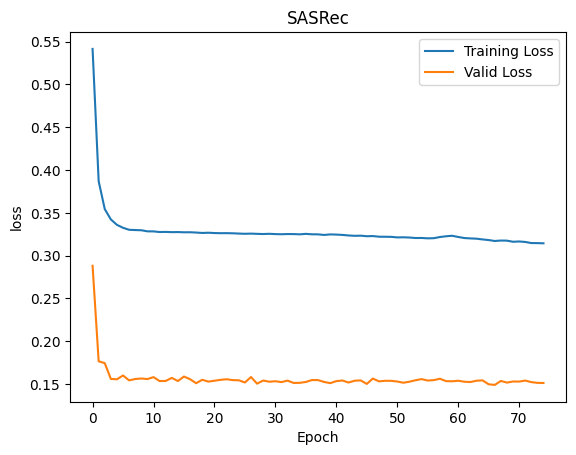

In [ ]:
fig,ax=plt.subplots()
ax.set_title("SASRec")
ax.set_xlabel("Epoch")
ax.set_ylabel("loss")
ax.plot(trList,label="Training Loss")
ax.plot(valList,label="Valid Loss")
ax.legend()

In [ ]:
Loss=pd.DataFrame(columns=["training Loss","Valid Loss"])
Loss["training Loss"]=trList
Loss["Valid Loss"]=valList
Loss.to_csv("/content/drive/MyDrive/23SpringRecsys/FinalProject/training_loss_500Length_BCE.csv")

#Model Side confusion matrix (Not evaluated on negative samples in recommendation scenario bc I don't have time)#

In [ ]:
model=SASRec(num_users=1000,num_items=4371900,num_authors=8839697,num_auxi_types=6)


In [ ]:
model=SASRec(num_users=1000,num_items=4371900,num_authors=8839697,num_auxi_types=6)
model.load_state_dict(torch.load("/content/drive/MyDrive/23SpringRecsys/FinalProject/bestModel_HuberLoss.pt",map_location=torch.device('cuda')))

<All keys matched successfully>

In [ ]:
def Accuracy(predictions,targets):
  predictions=torch.flatten(predictions)
  targets=torch.flatten(targets)
  num_correct=torch.sum(predictions==targets)
  num_samples=len(predictions)
  acc=num_correct/num_samples
  return acc

def Recall(predictions,targets):
  predictions=torch.flatten(predictions)
  targets=torch.flatten(targets)
  num_tp=torch.sum(torch.logical_and(predictions==1,targets==1))
  num_p=torch.sum(targets==1)
  if num_p>0:
    rec=num_tp/num_p
  else:
    rec=0
  return rec

def Precision(predictions,targets):
  num_tp=torch.sum(torch.logical_and(predictions==1,targets==1)).item()
  num_fp=torch.sum(torch.logical_and(predictions==1,targets==0)).item()
  if num_tp+num_fp>0:
    prec=num_tp/(num_tp+num_fp)
  else:
    prec=0
  return prec

def F1Score(predictions,targets):
  prec=Precision(predictions,targets)
  rec=Recall(predictions,targets)
  if prec+rec>0:
    f1=2*prec*rec/(prec+rec)
  else:
    f1=0
  return f1

In [ ]:
def Rmse(predictions,targets):
  return torch.sqrt(torch.mean(torch.pow(predictions-targets,2)))

In [ ]:
model.eval()
model.to(device)
recall=0
acc=0
f1=0
prec=0
rmse=0
with torch.no_grad():
    for _, (user,video,author,auxi_feedback,wt_time) in enumerate(test_dl):
      logit=model(user,video,author,auxi_feedback)
      target=torch.where(wt_time>0.5,torch.ones_like(wt_time),torch.zeros_like(wt_time)).unsqueeze(1)
      #target=wt_time
      #print(wt_time)
      #print(logit)
      target.to(device)
      target=target.float()
      target=torch.transpose(target,0,1)
      target=torch.transpose(target,0,2)
      #logit=torch.abs(logit)
      #prediction=logit.transpose(0,1).squeeze(-1)
      prediction=torch.where(logit>0.5,torch.ones_like(logit),torch.zeros_like(logit))
      recall+=Recall(prediction,target)
      acc+=Accuracy(prediction,target)
      f1+=F1Score(prediction,target)
      prec+=Precision(prediction,target)
      #rmse+=Rmse(prediction,target)

f1/=len(test_dl)
prec/=len(test_dl)
recall/=len(test_dl)
acc/=len(test_dl)
print(recall)
print(acc)
print(f1)
print(prec)
#print(rmse)

tensor(0.4409, device='cuda:0')
tensor(0.7730, device='cuda:0')
tensor(0.2730, device='cuda:0')
0.19815124471331996


##DDQN##

In [ ]:
import pfrl

In [ ]:
import gym
model=SASRec(num_users=1000,num_items=4371900,num_authors=8839697,num_auxi_types=5)
model.load_state_dict(torch.load("/content/drive/MyDrive/23SpringRecsys/FinalProject/bestModel.pt",map_location=torch.device('cpu')))
#Ref https://github.com/pfnet/pfrl/blob/master/examples/quickstart/quickstart.ipynb

<All keys matched successfully>

In [ ]:
from gym import spaces
import numpy as np


class ShortVideoEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, data,model):
        self.data=data
        self.sasrec=model
        self.observation_space=spaces.Box(low=-np.inf, high=np.inf, shape=(32,))
        self.action_space=spaces.Discrete(4371900)
        self.history=[]
        self.current_step=0
        self.episode_reward=0
        
    def reset(self):
        self.current_step=0
        self.episode_reward=0
        self.user_id=np.random.choice(self.data.user_id.unique())
        self.user_items=torch.tensor(self.data[self.data.user_id==self.user_id]["video_id"].values,dtype=torch.long,device=device)
        self.user_id=torch.tensor(self.user_id,dtype=torch.long,device=device)
        self.state=self.sasrec.item_embedding(self.user_items)
        return self.state
        
    def step(self, action):
        self.current_step+=1
        reward=self.sasrec(torch.tensor(self.user_id),torch.tensor(self.data.iloc[action]['video_id']),torch.tensor(self.data.iloc[action]['author_id']),torch.tensor(0))
        self.episode_reward+=reward
        done=self.current_step>=len(self.user_items)
        self.history.append(action)
        current_state_tensor=torch.tensor(self.history[-100:],dtype=torch.long,device=device)
        #self.sasrec.update_embedding(self.user_id, self.user_items.iloc[action]['video_id'])
        if done:
          return self.state,reward,done,{}
        else:
          self.state=self.sasrec.item_embedding(current_state_tensor)
          return self.state,reward,done,{}
        
    def render(self, mode='human'):
        print(f"Current step:{self.current_step},Current reward:{self.episode_reward}")

In [ ]:
env=ShortVideoEnv(train_df,model)
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

env.render()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
observation space: Box(32,)
action space: Discrete(1637273)
initial observation: tensor([[-8.7880e-03,  5.4464e-01, -2.7001e-01,  ...,  5.1060e-01,
          2.9986e-05,  6.7819e-01],
        [ 1.6522e+00,  5.1812e-01,  1.1422e+00,  ...,  7.6901e-01,
         -7.0464e-01,  2.1899e-01],
        [ 2.7778e-01,  1.6542e-01,  9.5857e-01,  ...,  8.8678e-02,
          1.8231e+00,  2.8856e-01],
        ...,
        [-1.7015e+00,  3.4999e-01, -3.0355e-02,  ...,  9.5992e-01,
          1.0865e+00, -2.9210e-01],
        [-9.6497e-01, -7.2143e-01, -4.2005e-01,  ..., -9.6636e-01,
          1.3882e+00, -1.4546e+00],
        [ 2.9851e-01,  3.5892e-01,  4.2176e-01,  ...,  9.6921e-01,
         -8.8143e-01,  2.1770e-01]], grad_fn=<EmbeddingBackward0>)
next observation: tensor([[ 1.6074e-01,  1.1875e-01, -1.1119e+00,  1.5343e+00,  4.5933e-01,
         -3.5584e-03,  3.0374e-02,  6.3466e-03,  3.5178e-01,  1.03

In [ ]:
obs_size=env.observation_space.low.size
n_actions=env.action_space.n
q_func=torch.nn.Sequential(
    torch.nn.Linear(obs_size, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, n_actions),
    pfrl.q_functions.DiscreteActionValueHead(),
)

optimizer=torch.optim.Adam(q_func.parameters(),eps=1e-2)

In [ ]:
gamma=0.9
#eps-greedy strategy
explorer=pfrl.explorers.ConstantEpsilonGreedy(epsilon=0.3,random_action_func=env.action_space.sample)

replay_buffer=pfrl.replay_buffers.ReplayBuffer(capacity=10**6)

phi=lambda x: x.astype(np.float32, copy=False)
gpu=-1
agent=pfrl.agents.DoubleDQN(
    q_func,
    optimizer,
    replay_buffer,
    gamma,
    explorer,
    replay_start_size=500,
    update_interval=1,
    target_update_interval=100,
    gpu=gpu,
)

In [ ]:
import logging
import sys
logging.basicConfig(level=logging.INFO, stream=sys.stdout, format='')

pfrl.experiments.train_agent_with_evaluation(
    agent,
    env,
    steps=2000,           # Train the agent for 2000 steps
    eval_n_steps=None,       # We evaluate for episodes, not time
    eval_n_episodes=10,       # 10 episodes are sampled for each evaluation
    train_max_episode_len=200,  # Maximum length of each episode
    eval_interval=1000,   # Evaluate the agent after every 1000 steps
    outdir='result',      # Save everything to 'result' directory
)

In [ ]:
# n_episodes=300
# max_episode_len=200
# for i in range(1,n_episodes+1):
#   obs=env.reset()
#   sum_of_reward=0
#   time_step=0
#   while True:
#     action=agent.act(obs)
#     obs,reward,done,_=env.step(action)
#     sum_of_reward+=reward
#     time_step+=1
#     reset=t==max_episode_len
#     agent.observe(obs,reward,done,reset)
#     if done or reset:
#       break
  
#   if i%10==0:
#     print(f'episode:{i},Sum of reward:{sum_of_reward}')
#   if i%50==0:
#     print(f'statistics: {agent.get_statistics()}')
# print("End")


#Test_dataset_ipnut#

In [ ]:
eva_recall=evaluate(model,test_ds,test_ds_input)

torch.Size([200, 500])


In [ ]:
test_ds_input=pd.read_csv("/content/drive/MyDrive/23SpringRecsys/FinalProject/test_ds_input_100.csv")
test_ds_input

,Unnamed: 0,user_id,video_id,author,auxi_feedback,WTRatio
0,0,0,4174235,8040759,0.064442,0
1,1,0,2852005,932583,0.064442,0
2,2,0,4102697,6528130,0.064442,0
3,3,0,3772506,8672520,0.064442,0
4,4,0,272524,979088,0.064442,0
...,...,...,...,...,...,...
86795,95,999,3154310,8405811,0.524964,0
86796,96,999,469298,2423622,0.524964,0
86797,97,999,4074645,1043772,0.524964,0
86798,98,999,1186653,1842038,0.524964,0


In [ ]:
def evaluate(model,test_ds,test_ds_input,k=[10,50],sample=500):
  model.eval()
  test_ds_input=SessionDataset(test_ds_input,max_seq_length=sample)
  test_dl_input=DataLoader(test_ds_input,batch_size=200,shuffle=True)
  recall_list=[]
  for i in k:
    recall=0
    for _,(user,item,author,auxi,wt_time) in enumerate(test_dl_input):
      logit=model(user,item,author,auxi)
      _,indices=torch.topk(logit,k=i)
      video_ids=test_ds.loc[user.cpu.numpy()]["video_id"]
      pred_items=[test_ds_input.loc[index]["video_id"] for index in indices.cpu().numpy()]
    recall/=len(test_dl_input)
    recall_list.append(recall)
  return recall_list

##Evaluation##

In [ ]:
#We deploy sampling evaluation method because the amount of short videos usually is large.

In [ ]:
# test_users=test_df["user_id"].unique()
# test_ds_input=pd.DataFrame()
# for user_id in test_users:
#   user_positive_samples=train_df[train_df['user_id']==user_id]['video_id'].values
#   user_negative_samples=np.setdiff1d(video_feature['video_id'].values,user_positive_samples)
#   history_feedback=train_df[train_df["user_id"]==user_id]["auxi_feedback"].mean()
#   negative_samples_ids=np.random.choice(user_negative_samples,100,replace=False)
#   author=video_feature[video_feature["video_id"].isin(negative_samples_ids)]["author_id"].values
#   user_ids=np.repeat(user_id,100)
#   feedback=np.repeat(history_feedback,100)
#   wt_time=np.repeat(0,100)
#   test_ds_user=pd.DataFrame({'user_id':user_ids,'video_id':negative_samples_ids,'author':author,'auxi_feedback':feedback,'WTRatio':wt_time})
#   test_ds_input=pd.concat([test_ds_input, test_ds_user])
#   if user_id%100==0:
#     print(user_id)


# test_ds_input.to_csv("/content/drive/MyDrive/23SpringRecsys/FinalProject/test_ds_input_100.csv")

0
100
200
300
400
500
600
800
900


In [ ]:
model=SASRec(num_users=1000,num_items=4371900,num_authors=8839697,num_auxi_types=6)
model.load_state_dict(torch.load("/content/drive/MyDrive/23SpringRecsys/FinalProject/bestModel.pt",map_location=torch.device('cuda')))

<All keys matched successfully>

#Fairness&bias evaluation#